Table of Contents

Preface

Data Visualisation Techniques

1 – Machine Learning Formation

2 – Business Constraints

3 – Dataset Backround

4 – Performance Metrics

5 – Literature Review

6 – First Cut Solution

7 – Getting Started

8- Removing Single Varaiables

9 – Handling Missing Values

10- Sepreating Features for Analysis

11- Histogram Feature Analysis

12 - Numerical Feature Analysis

13 - Summarizzing our Exploratory Data Analysis 

14 - Preparing Our Data

15 - Expermenting with Machine Learning models

16- Conclusion

17 - References

We have been tasked by a haulage company to analyse a dataset collected from their scania truck fleet which are used daily. They advise that it is essential to reduce maintance costs as a result breakdowns during daily operations. They advise us some of these breakdowns are  due to the failure of the air pressure system. They have asked by using Data Analytics can we use the dataset to reduce these costs.

WE advise that it may be possible to build a predictive model that may help in identfying the compontents that are and are not linked to the breakdown of the air pressure system. This may help them to arrange maintance schedules to insure the optium functioning of their fleet.

The air pressure system in heavy duty trucks use  compressed air to drive the pistons which use the brake pads to slow down the vechicle. The advantage of this system over a  hydraulic system is that is easyily available and cost effective. However we need to be mindful that as a result of ore analysis may extend or reduce the service intervals for these trucks. There have been instances were failures of air pressure systems have led to human fatalies as a result the cost of misclassification is high. As our EDA will ultimatley lead to a machine learing predictive model being produced it is something we need to be aware off.

In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from tqdm import tqdm
import missingno as msno
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D



C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
# Read the dataset
train = pd.read_csv('aps_failure_set.csv')

# Show first 5 records
train.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(60000, 171)

# BASic EDA

In [6]:
print('Number of data points in the train dataset', train.shape[0])
print('Number of features in the given train dataset', train.shape[1])

Number of data points in the train dataset 60000
Number of features in the given train dataset 171


In [7]:
# Replacing all the class labels as follows:

# neg = 0
# pos = 1
# Replacing all the class labels as follows:

# neg = 0
# pos = 1
class_labels_train = []
for x in tqdm(train.index):
    if train['class'].loc[x] == 'neg':
        class_labels_train.append(0)
        
    else:
        class_labels_train.append(1)

100%|█████████████████████████████████████████████████████████████████████████| 60000/60000 [00:01<00:00, 50413.69it/s]


In [8]:
train['class'] = class_labels_train

In [9]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [10]:
train['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram plot of class labels')

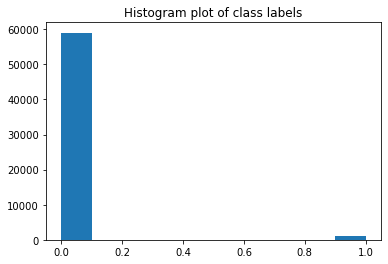

In [11]:
plt.hist(train['class'])
plt.title("Histogram plot of class labels")

In [12]:
print("Percentage of negative class in the given dataset :", (train[train['class']== 0].shape[0] / train.shape[0]) * 100)
print("Percentage of positive class in the given dataset :", (train[train['class']==0].shape[1]/train.shape[1]) * 100)

Percentage of negative class in the given dataset : 98.33333333333333
Percentage of positive class in the given dataset : 100.0


y_train = train['class']
train.drop(['class'],axis = 1,inplace = True)

In [13]:
train.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,NaN,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,NaN,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,0.016667,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.128020,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Replacing the na and nan values with np.NaN
train.replace(to_replace='nan', value = np.NaN,inplace = True)

train.replace(to_replace = 'na', value = np.NaN, inplace = True)

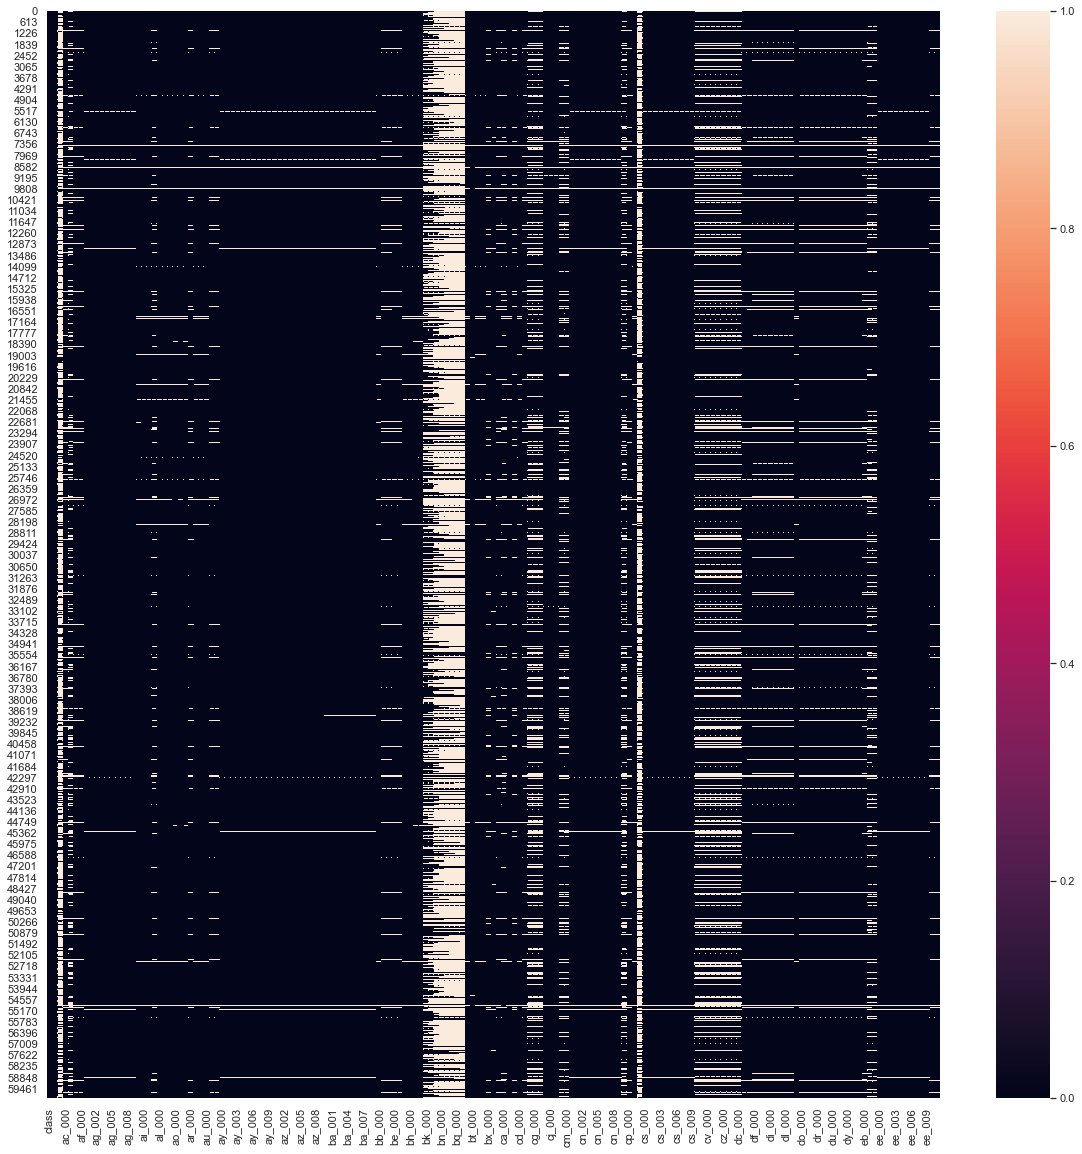

In [15]:
# plotting the heatmap of train dataset to visualize the null values.
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(train.isnull())
plt.show(plot)

In [16]:
columns_names = train.columns

<AxesSubplot:label='bf4f2bc8-39d4-4e56-80e5-3dc811c19f8f'>

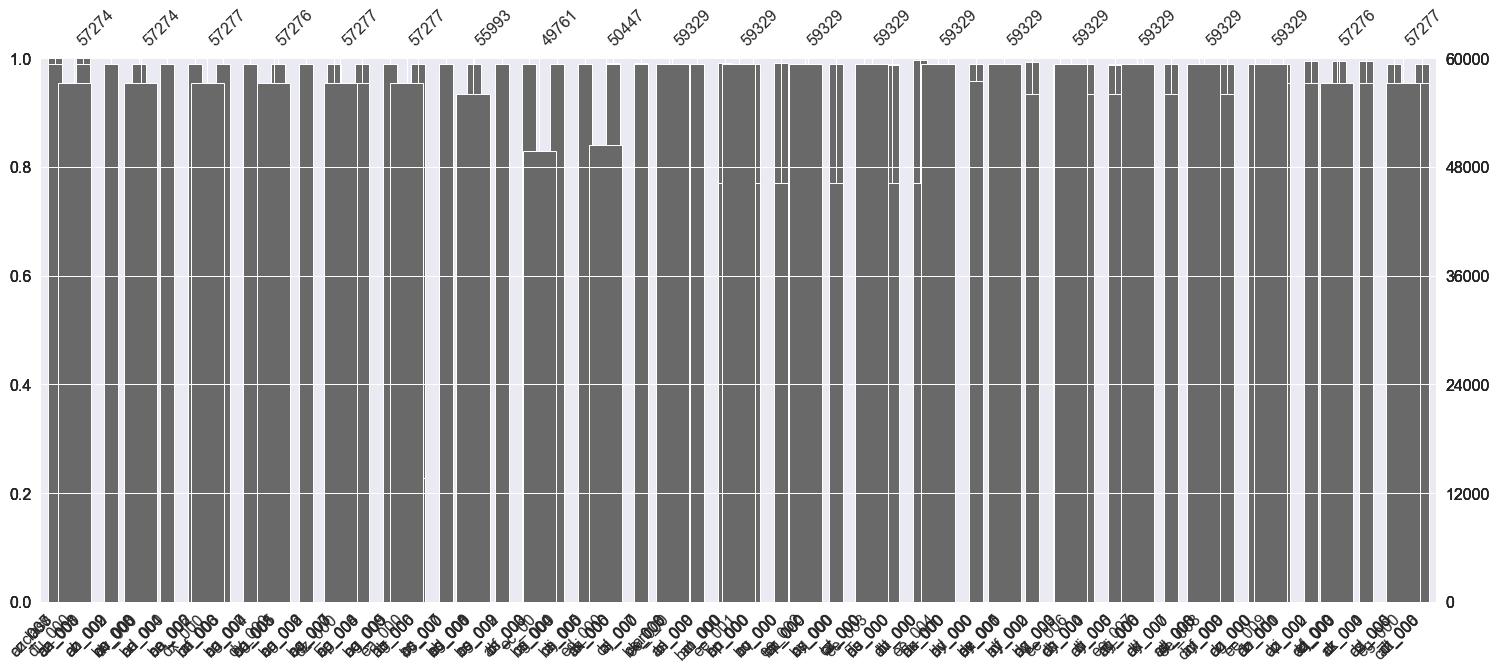

In [17]:
msno.bar(train[columns_names[0:50]])
msno.bar(train[columns_names[50:100]])
msno.bar(train[columns_names[100:150]])
msno.bar(train[columns_names[150:171]])

In [18]:
# Dropping all the columns where the number of missing values are more than 42K
train.dropna(axis = 1, thresh=42000,inplace= True)

In [19]:
train.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [20]:
impute_median = SimpleImputer(missing_values= np.nan, strategy='median',copy = True, verbose= 2)
train_imputed_median = pd.DataFrame(impute_median.fit_transform(train),columns=train.columns)
train_imputed_median.to_csv("Train_imputed_median")

C:\Users\andrew\anaconda3\lib\site-packages\sklearn\impute\_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [21]:
# Imputation using mean
impute_mean = SimpleImputer(missing_values= np.nan, strategy='mean',copy = True, verbose= 2)
train_imputed_mean = pd.DataFrame(impute_mean.fit_transform(train),columns=train.columns)
train_imputed_mean.to_csv("Train_imputed_mean")

C:\Users\andrew\anaconda3\lib\site-packages\sklearn\impute\_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [22]:
# Imputation using most frequent
impute_most_frequent = SimpleImputer(missing_values= np.nan, strategy='most_frequent',copy = True, verbose= 2)
train_imputed_most_frequent = pd.DataFrame(impute_most_frequent.fit_transform(train),columns=train.columns)
train_imputed_most_frequent.to_csv("Train_imputed_most_frequent")

C:\Users\andrew\anaconda3\lib\site-packages\sklearn\impute\_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [23]:
train.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [24]:
scaler=StandardScaler()
X_std = StandardScaler().fit_transform(train.drop(columns=["class"]))
imputer=SimpleImputer(strategy='mean')
X_std=imputer.fit_transform(X_std)
pca=PCA(n_components=4)
vecs=pca.fit_transform(X_std)
reduced_df=pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3',
                                            'Principal Component 4'])
final_df= pd.concat([reduced_df,train[['class']]],axis=1)
final_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,class
0,2.272946,-1.396371,-1.523933,-0.099252,0
1,-0.620249,-0.481546,-0.062022,-0.046744,0
2,-1.251755,-0.118584,0.324379,-0.153999,0
3,-3.201109,0.295246,0.736371,0.227724,0
4,0.247557,-0.230922,-0.766598,-0.580080,0
...,...,...,...,...,...
59995,4.767086,-1.540316,-1.600559,-1.356545,0
59996,-3.080125,0.186010,0.673225,0.205213,0
59997,-3.197882,0.196741,0.782641,0.241452,0
59998,2.310127,-2.794649,-1.654293,-0.078712,0


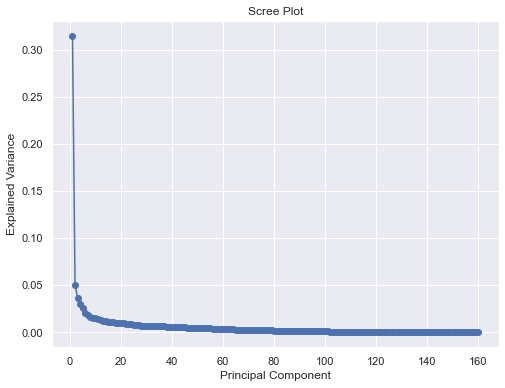

In [25]:
pca= PCA()
pca.fit(X_std)
explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(range(1,len(explained_variance)+ 1),explained_variance,marker='o',linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

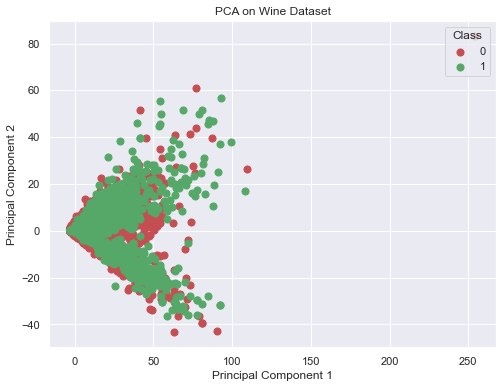

In [26]:
plt.figure(figsize=(8, 6)) # set the size of the canvas
targets = list(set(final_df['class'])) # we create a list of possible targets (there are 3)
colors = ['r', 'g', 'b'] # we define a simple list of colors to differentiate the targets

# loop to assign each point to a target and color
for target, color in zip(targets, colors):
     idx = final_df['class'] == target
     plt.scatter(final_df.loc[idx, 'Principal Component 1'], final_df.loc[idx, 'Principal Component 2'], c=color, s=50)

# finally, we show the graph
plt.legend(targets, title="Class", loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.show()

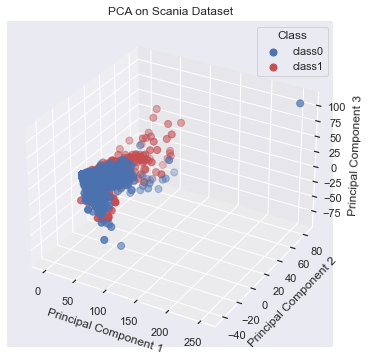

In [27]:
fig= plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")

targets= list(set(final_df['class']))
colors=['b','r','g']


for target, color in zip(targets,colors):
    idx=final_df['class'] ==target
    ax.scatter(final_df.loc[idx,'Principal Component 1'], final_df.loc[idx,'Principal Component 2'],final_df.loc[idx,'Principal Component 3'],c=color, s =50, label=f'class{target}')
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA on Scania Dataset')

ax.legend(title='Class',loc='upper right')

plt.show()

In [28]:
scania_array = final_df.values

In [32]:
from sklearn.model_selection import train_test_split
X = scania_array[:,0:4]
y = scania_array[:,4]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma="auto")))

In [33]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983024 (0.001597)
LDA: 0.980000 (0.001925)
KNN: 0.986929 (0.001398)
CART: 0.983714 (0.001143)
NB: 0.973381 (0.002467)
SVM: 0.984524 (0.000439)


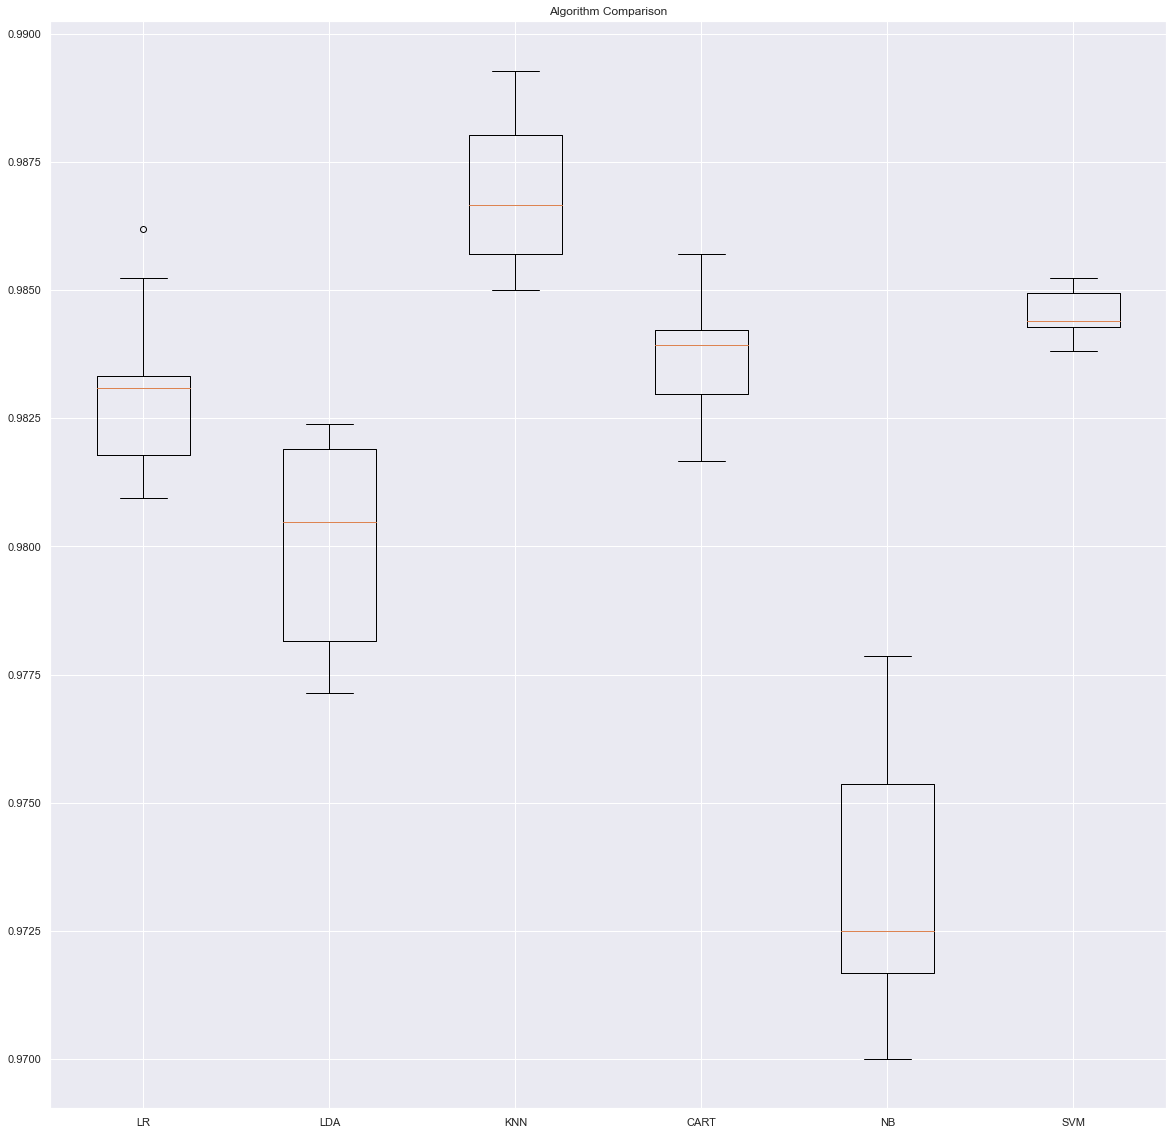

In [34]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbours=5)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [42]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9888333333333333
[[17660    56]
 [  145   139]]
